In [1]:
import numpy
from msppy.msp import MSLP
from msppy.solver import SDDP, Extensive
from msppy.evaluation import Evaluation
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('darkgrid')

American put option pricing
=====================
This tutorial deals with the American put option pricing. 

Introduction
----------------
In American option, early exercise is preferable when the continuation (time) value shrinks below intrinsic value. The value of the option at each time step is thus given by the maximum of the intrinsic value and continuation value. By virtue of dynamic equation, the value at each time $i$ given by,    
\begin{equation}
    V_i(S_i) = \max\big\{(K-S_i)_+,\mathbb{E}_i^Q[\exp(-r\Delta t) V_{i+1}(S_{i+1})|S_i]\big\}
\end{equation}
Where $K$ is the strike price, $\Delta t$ is the time step, $\mathbb{E}_i^Q$ is the risk neutral measure and $r$ is the interest rate

Binomial tree model
---------------------------
Suppose spot price is 36, strike price is 40, volatility is 0.2, interest rate is 6%, expiration is 1 year, time step is 0.02.

In [2]:
S = 36
K = 40
sigma = 0.2
r = 0.06
T = 50
step = 0.02
u = numpy.exp(sigma*numpy.sqrt(step))
d = 1/u
p = (numpy.exp(r*step)-d)/(u-d)

Solution
----------

In [3]:
put = MSLP(T=T+1, discount=numpy.exp(-r*step), ctg=1)
coef = [-u,-d]
for t in range(T+1):
    m = put[t]
    s_now, s_past = m.addStateVar()
    y = m.addVar(obj=1,name="y")
    if t > 0:
        m.addConstr(s_now + s_past == 0, uncertainty={s_past: coef})
        m.set_probability([p,1-p])
    else:
        m.addConstr(s_now == S)
    if t < T:
        m.addConstr(m.getVarByName("y") + m.alpha*numpy.exp(-r*step) >= K-m.states[0])
    else:
        m.addConstr(m.getVarByName("y") >= K-m.states[0])
sddp = SDDP(put)
sddp.solve(max_iterations=200, n_processes=3, n_steps=3, logToConsole=0)

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

Evolution of bound.

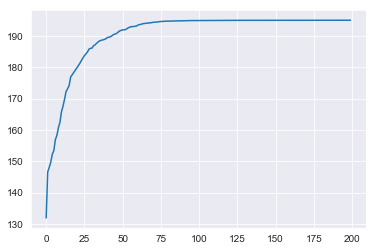

In [4]:
plt.plot(sddp.db)

More sophicated model can be considered.